# **Descarga y exploración del corpus**

1.   Cardinalidad del vocabulario
2.   Distribución de reviews por número de estrellas
3.   Nº de reviews positivas y negativas
4.   N-grams más frecuentes
5.   Nubes de palabras
6.   Visualización en 2 dimensiones de algunos word embeddings calculados con
7.   Word2Vec (elegir 4-5 palabras y pintar las top 10 más similares)
8.   Conclusiones de la exploración
9.   Cualquier otra métrica / exploración / cálculo que el alumno considere




In [18]:
!pip install num2words
!pip install nltk
!pip install pip beautifulsoup4
!pip install pip WordCloud
!pip install pip Counter
!pip install pip Word2Vec
!pip install scikit-learn
!pip install gensim






In [19]:
import pandas as pd
import unicodedata
from num2words import num2words
from nltk import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from collections import Counter
from sklearn.manifold import TSNE
from gensim.models import Word2Vec

import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk import ngrams

from collections import Counter
import re

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

nltk_sw_list = stopwords.words('english')
print(nltk_sw_list[:10])



['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:


def nltk_cleaner(text, tokenizer, sw_list, lemmatizer):
    clean_text = list()

    # Eliminar acentos, etc
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    if '<br />' in text:  # este texno no se elimina en las subsecuentes fases y por eso se lo elimina manualmente
        text= text.replace('<br />',' ')

    # Separar palabras eliminando signos de puntuación
    for word in tokenizer.tokenize(text):

        # Eliminar stop words
        if word not in sw_list:
        # Eliminar espacios sobrantes, convertir a minúsculas y lematizar
#            clean_word = lemmatizer.lemmatize(word).lower().strip() #TODO : verificar la descarga de wordnet
            clean_word = word.lower().strip()
            soup = BeautifulSoup(clean_word, "html.parser")
            clean_word = soup.get_text()
            clean_text.append(clean_word)

    return ' '.join(clean_text)

In [21]:

# Inicializamos listas para almacenar registros
registros_1 = []
registros_2 = []
registros_3 = []
registros_4 = []
registros_5 = []

# Especifico la ruta del archivo descomprimido
#https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_2023/raw/review_categories/All_Beauty.jsonl.gz
ruta_destino_descomprimido = "All_Beauty.jsonl"


# Ejemplo de estructura JSON
#data =
#    {
#        "rating": 4.0,
#        "title": "Works great but smells a little weird.",
#        "text": "This product does what I need it to do, I just wish it was odorless or had a soft coconut smell. Having my head smell like an orange coffee is offputting. (granted, I did know the smell was described but I was hoping it would be light)",
#        "images": [],
#        "asin": "B081TJ8YS3",
#        "parent_asin": "B081TJ8YS3",
#        "user_id": "AGKHLEW2SOWHNMFQIJGBECAF7INQ",
#        "timestamp": 1588615855070,
#        "helpful_vote": 1,
#        "verified_purchase": True
#    },


# Máximo número de registros por categoría
max_registros = 1000
minima_cantida_texto=5


tokenizer = RegexpTokenizer(r'\w+')
stop_words = nltk_sw_list
lemmatizer = WordNetLemmatizer()

oraciones_totales = []

with open(ruta_destino_descomprimido, 'r') as archivo:
    # Continúa leyendo mientras no se haya alcanzado el máximo en alguna de las listas
    while len(registros_1)<=max_registros  and len(registros_2)<=max_registros   and len(registros_3)<=max_registros   and len(registros_4)<=max_registros  and len(registros_5)<=max_registros :

        linea = archivo.readline()

        # Si se alcanza el final del archivo, detener el bucle
        if not linea:
            break
        registro = pd.read_json(linea, typ='series')
        calificacion = registro['rating']
        titulo=registro['title']
        texto=registro['text']

        texto_normalizado=nltk_cleaner(titulo+' '+texto, tokenizer, stop_words, lemmatizer)

        registro['texto_completo']=texto_normalizado
        oraciones_totales.append(texto_normalizado)

        if calificacion == 1 and len(registros_1)<=max_registros and len(titulo)>minima_cantida_texto and len(texto)>minima_cantida_texto:
          registros_1.append(registro)
        if calificacion == 2 and len(registros_1)<=max_registros and len(titulo)>minima_cantida_texto and len(texto)>minima_cantida_texto:
          registros_2.append(registro)
        if calificacion == 3 and len(registros_1)<=max_registros and len(titulo)>minima_cantida_texto and len(texto)>minima_cantida_texto:
          registros_3.append(registro)
        if calificacion == 4 and len(registros_1)<=max_registros and len(titulo)>minima_cantida_texto and len(texto)>minima_cantida_texto:
          registros_4.append(registro)
        if calificacion == 5 and len(registros_1)<=max_registros and len(titulo)>minima_cantida_texto and len(texto)>minima_cantida_texto:
          registros_5.append(registro)




# Combina las listas en un DataFrame
df_registros_1 = pd.DataFrame(registros_1)
df_registros_2 = pd.DataFrame(registros_2)
df_registros_3 = pd.DataFrame(registros_3)
df_registros_4 = pd.DataFrame(registros_4)
df_registros_5 = pd.DataFrame(registros_5)



<ipython-input-21-63cadc5a3706>:49: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  registro = pd.read_json(linea, typ='series')
<ipython-input-21-63cadc5a3706>:49: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  registro = pd.read_json(linea, typ='series')
<ipython-input-21-63cadc5a3706>:49: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  registro = pd.read_json(linea, typ='series')
<ipython-input-21-63cadc5a3706>:49: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  registro = pd.read_json(linea, typ='s

In [22]:
# se utilizarán los comentarios calificados con 1, 2, 3 como negativos y 4, 5 Como positivos
df_registros_positivos = pd.concat([df_registros_4, df_registros_5]).reset_index(drop=True)
df_registros_negativos = pd.concat([df_registros_1, df_registros_2,df_registros_3]).reset_index(drop=True)
df_registros_todos= pd.concat([df_registros_1, df_registros_2,df_registros_3,df_registros_4,df_registros_5]).reset_index(drop=True)


In [23]:
# 1 CARDINALIDAD

texto_completo_columans = " ".join(df_registros_todos['texto_completo'].dropna())
texto_vocabulario_cardinalidad = len(set(texto_completo_columans.split()))

print(f"Cardinalidad original: {texto_vocabulario_cardinalidad}")


Cardinalidad original: 8515


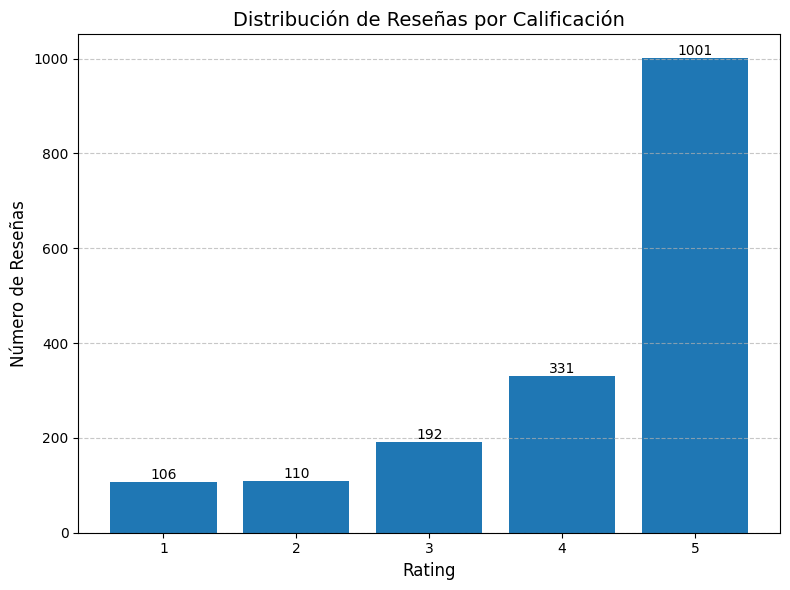

In [24]:
#2 Distribución de reviews por número de estrellas

import matplotlib.pyplot as plt
import pandas as pd

# Suponiendo que el DataFrame df_registros ya está definido y contiene una columna "rating"
# Contar las calificaciones
rating_counts = df_registros_todos['rating'].value_counts().sort_index()

# Crear un gráfico de barras con las cantidades en las barras
plt.figure(figsize=(8, 6))
bars = plt.bar(rating_counts.index, rating_counts.values)

# Añadir etiquetas encima de las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height),
             ha='center', va='bottom', fontsize=10)

# Personalizar el gráfico
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Número de Reseñas', fontsize=12)
plt.title('Distribución de Reseñas por Calificación', fontsize=14)
plt.xticks(rating_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


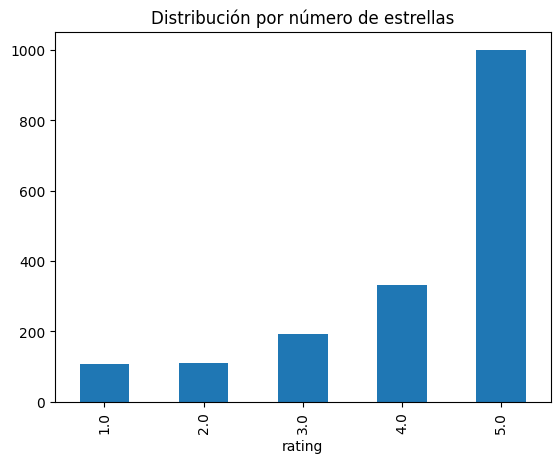

In [25]:
#3 Distribución de reviews por estrellas
df_registros_todos['rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución por número de estrellas')
plt.show()

In [26]:
# N-grams más frecuentes
bigrams_ = list(ngrams(texto_completo_columans.split(), 2))
trigrams_ = list(ngrams(texto_completo_columans.split(), 3))


In [27]:

bigrams_[:10]

[('synthetic', 'feeling'),
 ('feeling', 'felt'),
 ('felt', 'synthetic'),
 ('synthetic', 'claims'),
 ('claims', 'nothing'),
 ('nothing', 'special'),
 ('special', 'unfortunately'),
 ('unfortunately', 'waited'),
 ('waited', 'long'),
 ('long', 'return')]

In [28]:
trigrams_[:10]

[('synthetic', 'feeling', 'felt'),
 ('feeling', 'felt', 'synthetic'),
 ('felt', 'synthetic', 'claims'),
 ('synthetic', 'claims', 'nothing'),
 ('claims', 'nothing', 'special'),
 ('nothing', 'special', 'unfortunately'),
 ('special', 'unfortunately', 'waited'),
 ('unfortunately', 'waited', 'long'),
 ('waited', 'long', 'return'),
 ('long', 'return', 'results')]

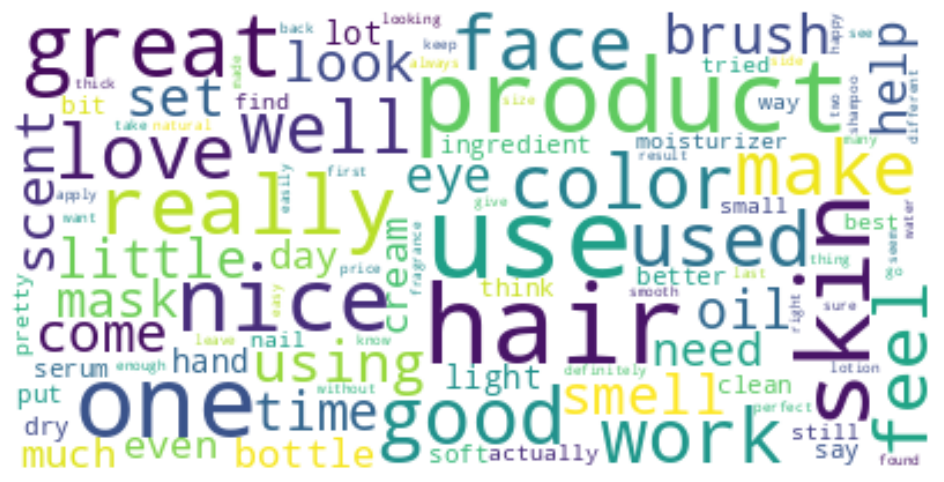

In [29]:
# Nube de palabras
def plot_word_cloud(text):
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(text))
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
words_list = texto_completo_columans.lower().strip().split()
plot_word_cloud(words_list)


In [30]:
from collections import Counter
import re

# Limpiar y dividir el texto en palabras
words_list = re.findall(r'\b\w+\b', texto_completo_columans.lower())

# Contar la frecuencia de cada palabra
word_counts = Counter(words_list)

# Crear las listas de palabras y frecuencias
words, counts = zip(*word_counts.most_common())

# Mostrar las listas generadas
print("Words:", words)
print("Counts:", counts)


Words: ('i', 'the', 'skin', 'it', 'hair', 'use', 'like', 'this', 'great', 'one', 'nice', 'good', 'product', 'really', 'well', 'face', 'love', 'would', 'used', 'get', 'little', 'also', 'oil', 'they', 'using', 'much', 'time', 'set', 'works', 'my', 'price', 'feel', 'scent', 'look', 'brush', 'work', 'products', 'make', 'comes', 'cream', 'easy', 'dry', 'soft', 'color', 'bit', 'these', 'makes', 'long', 'pretty', 'even', 'recommend', 'so', 'mask', 'not', 'bottle', 'light', 'better', 'feels', 'lot', 'eyes', '2', 'day', 'need', 'you', 'best', 'small', 'tried', 'ingredients', 'smell', 'smells', 'water', 'since', 'put', 'colors', 'quality', 'if', 'first', 'stars', 'clean', 'way', 'there', 'review', 'eye', 'made', 'think', 'two', '1', 'quickly', 'definitely', 'see', 'find', 'looks', 'enough', 'body', 'still', 'serum', 'perfect', 'thick', 'smooth', 'actually', 'apply', 'fine', 'sure', 'looking', 'different', 'nail', 'very', 'try', 'could', 'a', 'go', '3', 'hand', 'want', 'easily', 'moisturizer', 's

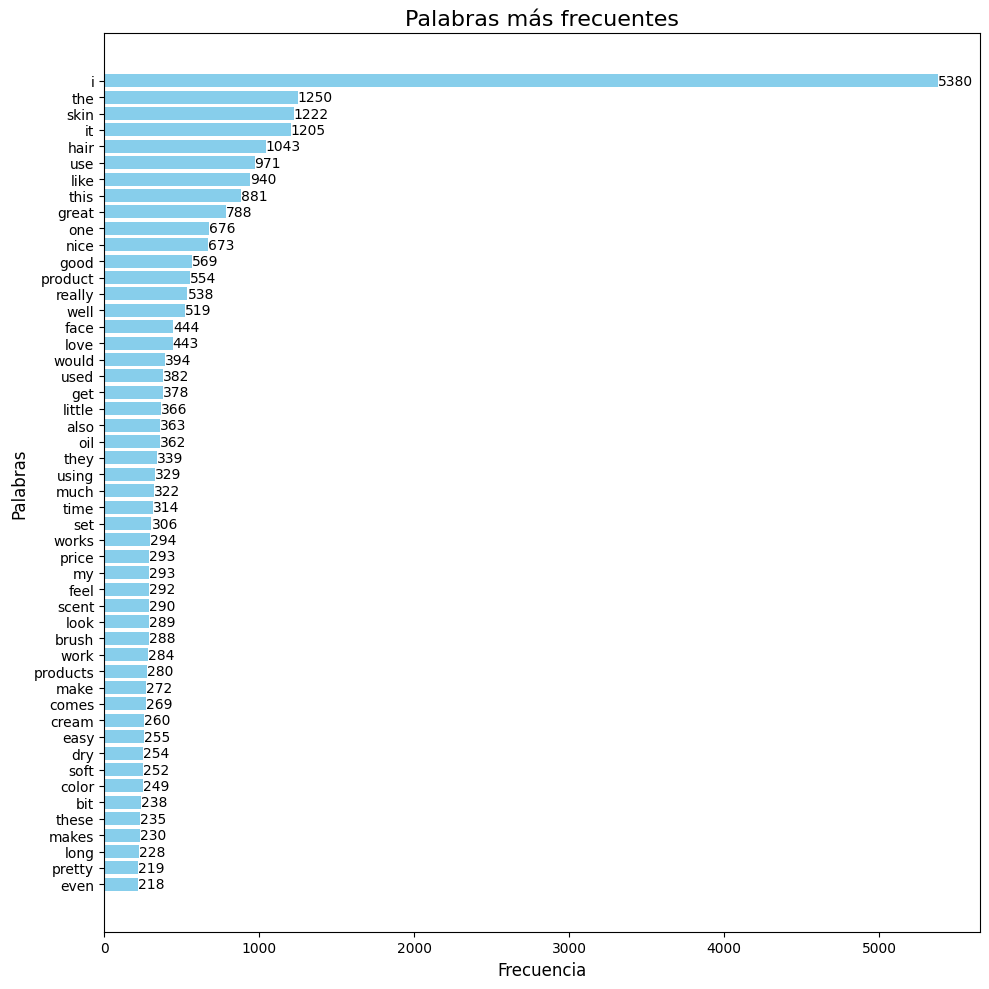

In [31]:
wf = Counter(texto_completo_columans.split())
wf_most_common = wf.most_common(50)
words = [w[0] for w in wf_most_common]
freqs = [w[1] for w in wf_most_common]
freqs, words = zip(*sorted(zip(freqs, words)))

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 10))
bars = plt.barh(words, freqs, color='skyblue')

# Añadir etiquetas con las cantidades
for bar in bars:
    plt.text(
        bar.get_width(),  # Posición horizontal (ancho de la barra)
        bar.get_y() + bar.get_height() / 2,  # Posición vertical
        f'{int(bar.get_width())}',  # Texto con la cantidad
        va='center',  # Centrar verticalmente
        ha='left',  # Alinear a la izquierda del final de la barra
        fontsize=10
    )

# Títulos y etiquetas
plt.title("Palabras más frecuentes", fontsize=16)
plt.xlabel("Frecuencia", fontsize=12)
plt.ylabel("Palabras", fontsize=12)

# Ajustar espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()

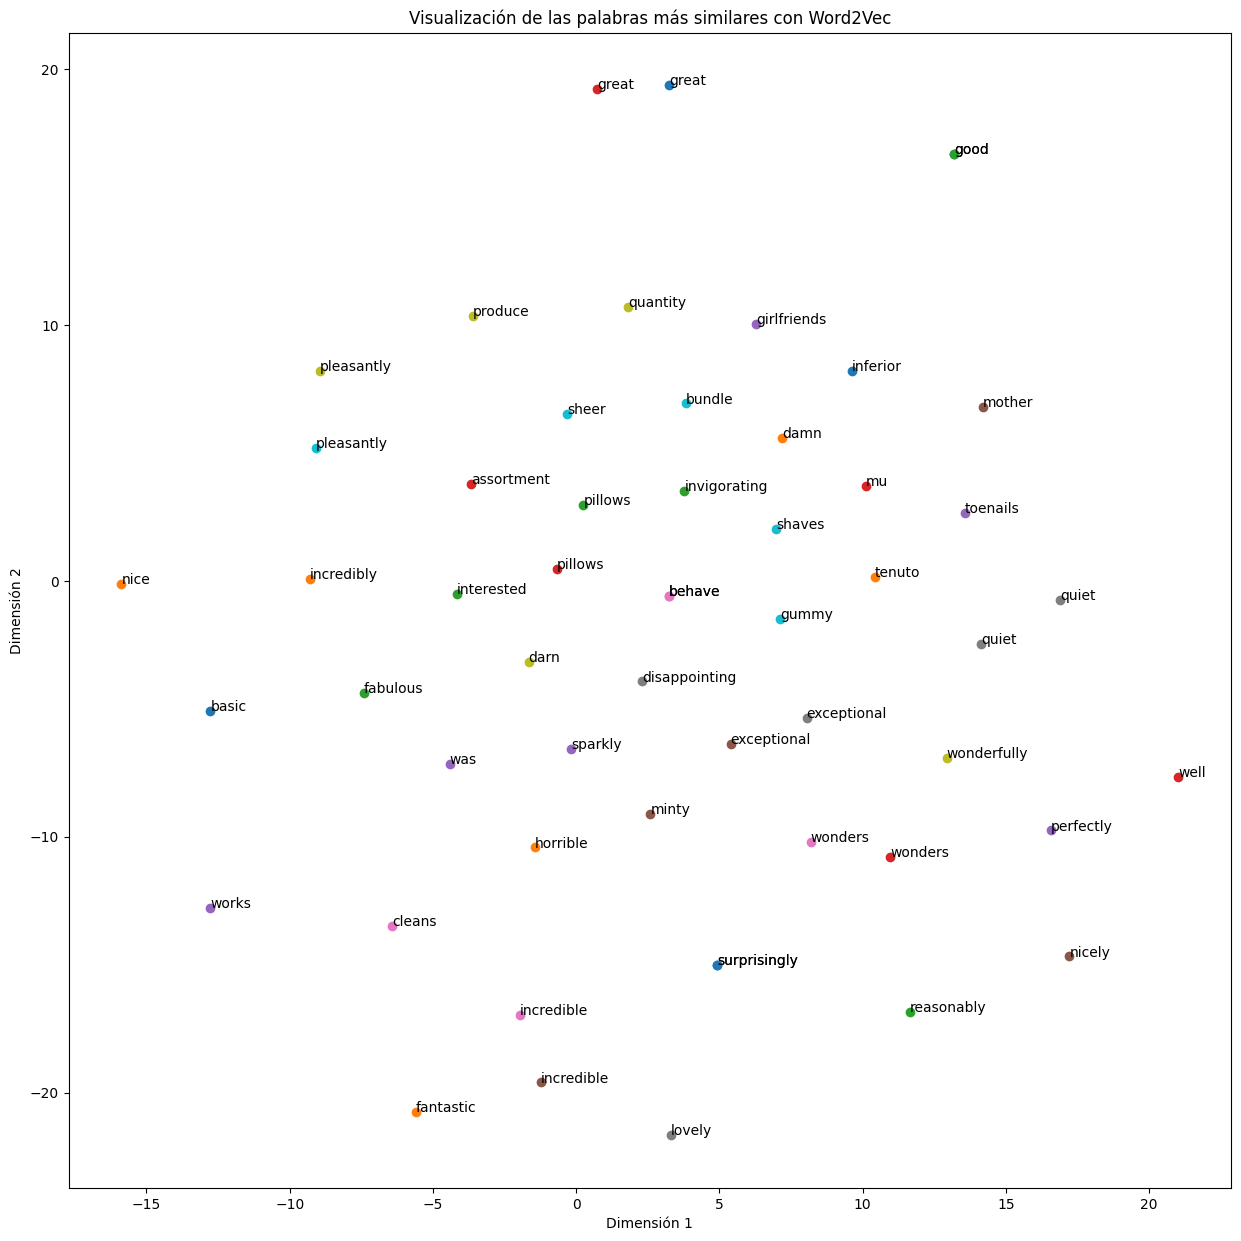

In [37]:
#Visualización en 2 dimensiones de algunos word embeddings calculados con
#Word2Vec (elegir 4-5 palabras y pintar las top 10 más similares)

from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Ejemplo de datos (carga tu dataset real)
sentences =oraciones_totales

# Preparar datos para Word2Vec
tokenized_sentences = [sentence.split() for sentence in sentences]

# Entrenar modelo Word2Vec
model = Word2Vec(
            sentences=tokenized_sentences,
            vector_size=100,
            window=3,
            min_count=1,
            workers=2,
             sg=1,
            epochs=20
            )

# Seleccionar palabras para analizar similitud
words = ["great", "nice", "good", "well","works"]

# Obtener las palabras más similares
similar_words = {}
for word in words:
    if word in model.wv:
        similar_words[word] = [word] + [pair[0] for pair in model.wv.most_similar(word, topn=10)]

# Extraer embeddings para visualización
all_words = sum(similar_words.values(), [])
word_embeddings = [model.wv[word] for word in all_words if word in model.wv]
word_embeddings = np.array(word_embeddings)
# Reducir dimensionalidad con t-SNE
tsne = TSNE(n_components=2, perplexity=30, max_iter=500, random_state=42)
reduced_embeddings = tsne.fit_transform(word_embeddings)

# Visualización
plt.figure(figsize=(15, 15))
for i, word in enumerate(all_words):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
    plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

plt.title("Visualización de las palabras más similares con Word2Vec")
plt.xlabel("Dimensión 1")
plt.ylabel("Dimensión 2")
plt.show()


# **Conclusiones de la exploración**
*	La cardinalidad del vocabulario  es de 8515 palabras únicas.
* La distribución de reseñas por calificaciones mostró más datos en las categorías de 4 y 5 de rating, clasificados como positivos, mientras que 1, 2, y 3 estrellas se consideran negativos.
*   En la exploración se pudo observar que a veces hay texto requiere eliminación manual, en el caso de este dataset se encontró '<br /\>' , ésta expresión no se pudo eliminar directamente.
*   Los N-grams más frecuentes, como (“synthetic”, “feeling”) o (“great”, “product”), destacan los temas y aspectos más mencionados en las reseñas.
* Las palabras más frecuentes como “skin”, “hair”, “use”, y “great” que confirman  el enfoque del dataset en productos de belleza

